# Import Libraries

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Data Importing

In [358]:
train_df = pd.read_csv('C:/Users/alexa/OneDrive/Έγγραφα/Work_Python/Data_Analysis/Project 1 Titanic/train.csv')
test_df = pd.read_csv('C:/Users/alexa/OneDrive/Έγγραφα/Work_Python/Data_Analysis/Project 1 Titanic/test.csv')

## Data Inspection

In [359]:
def inspect_dataframe(df, name="Dataset"):
    print(f"Head {name}:\n", df.head(), "\n")
    print(f"Info of {name}:\n", {df.info()}, "\n")
    print(f"Shape of {name}:\n", {df.shape}, "\n")
    print(f"Summary {name}:\n, {df.describe(include='all')}")
    print(f"Missing values in {name}:\n", df.isna().sum(), "\n")

inspect_dataframe(train_df, "Train dataset")
inspect_dataframe(test_df, "Test dataset")

Head Train dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

## Exploratory Data Analysis  - EDA

In [360]:
print('Distribution of the target variable:') # Check the people who survived
print(train_df['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Pclass:') # Check the people who survived by Pclass
print(train_df.groupby('Pclass')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Embarked:') # Check the people who survived by Embarked
print(train_df.groupby('Embarked')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Sex:') # Check the people who survived by Sex
print(train_df.groupby('Sex')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to SibSp:') # Check the people who survived by SibSp
print(train_df.groupby('SibSp')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Parch:') # Check the people who survived by Parch
print(train_df.groupby('Parch')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Age:') # Check the people who survived by Age
print(train_df.groupby('Age')['Survived'].value_counts())
print('_____________________________________________')
print('Distribution of the target variable with respect to Fare:') # Check the people who survived by Fare
print(train_df.groupby('Fare')['Survived'].value_counts())
print('_____________________________________________')

Distribution of the target variable:
Survived
0    549
1    342
Name: count, dtype: int64
_____________________________________________
Distribution of the target variable with respect to Pclass:
Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64
_____________________________________________
Distribution of the target variable with respect to Embarked:
Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64
_____________________________________________
Distribution of the target variable with respect to Sex:
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64
_____________________________________________
Distribution of the 

## EDA Visualization

C:\Users\alexa\AppData\Local\Temp\ipykernel_27276\2215367807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette=['red', 'blue'], ax=axes[0])
C:\Users\alexa\AppData\Local\Temp\ipykernel_27276\2215367807.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Died', 'Survived'], fontsize=12, fontname='Times New Roman')


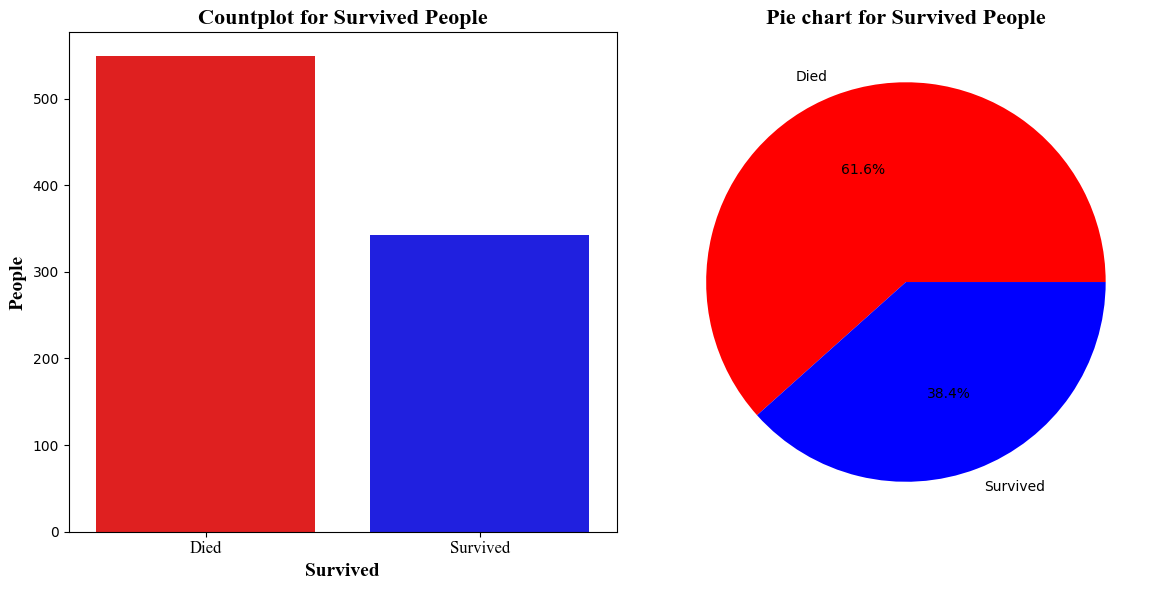

In [361]:
# Check the people who survived
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Countplot for people who survived
sns.countplot(x='Survived', data=train_df, palette=['red', 'blue'], ax=axes[0])
axes[0].set_ylabel('People', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[0].set_xlabel('Survived', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[0].set_xticklabels(['Died', 'Survived'], fontsize=12, fontname='Times New Roman')
axes[0].set_title('Countplot for Survived People', fontsize=16, fontweight='bold', fontname='Times New Roman')
# Pie chart for Survived People
train_df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue'], labels=['Died', 'Survived'], ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Pie chart for Survived People', fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.tight_layout()
plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_27276\2401881932.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'], fontsize=12, fontname='Times New Roman')


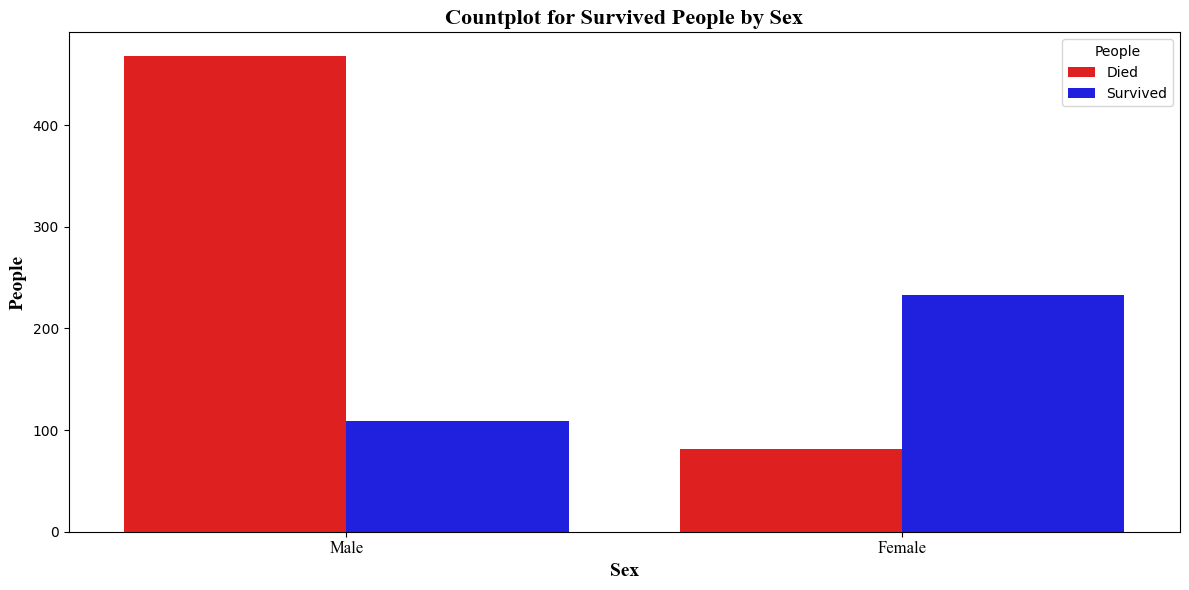

In [362]:
# Countplot for people who survived Sex
fig, ax = plt.subplots(1, figsize=(12, 6))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette=['red', 'blue'])
ax.set_ylabel('People', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
ax.set_xlabel('Sex', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
ax.set_xticklabels(['Male', 'Female'], fontsize=12, fontname='Times New Roman')
ax.set_title('Countplot for Survived People by Sex', fontsize=16, fontweight='bold', fontname='Times New Roman')
ax.legend(['Died', 'Survived'], title='People', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_27276\3388694062.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['1st class', '2nd class', '3rd class'], fontsize=12, fontname='Times New Roman')
C:\Users\alexa\AppData\Local\Temp\ipykernel_27276\3388694062.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], fontsize=12, fontname='Times New Roman')


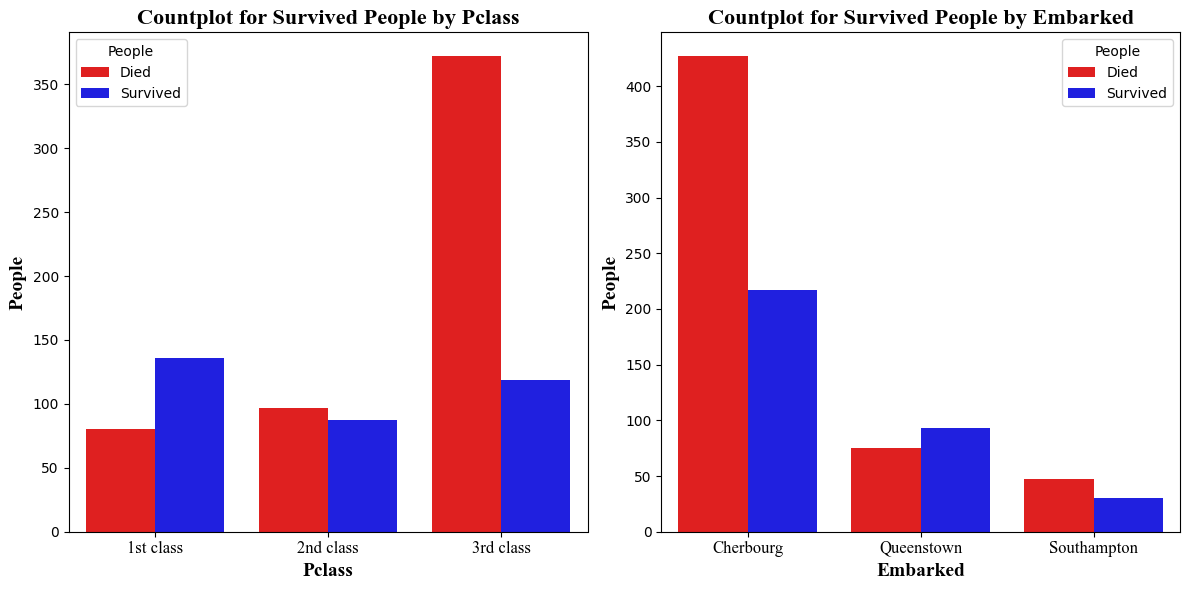

In [363]:
# Countplot for people who survived by Pclass
fig, axes = plt.subplots(1,2, figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette=['red', 'blue'], ax=axes[0])
axes[0].set_ylabel('People', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[0].set_xlabel('Pclass', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[0].set_xticklabels(['1st class', '2nd class', '3rd class'], fontsize=12, fontname='Times New Roman')
axes[0].set_title('Countplot for Survived People by Pclass', fontsize=16, fontweight='bold', fontname='Times New Roman')
axes[0].legend(['Died', 'Survived'], title='People', loc='upper left')

# Countplot for people who survived by Embarked
sns.countplot(x='Embarked', hue='Survived', data=train_df, palette=['red', 'blue'], ax=axes[1])
axes[1].set_ylabel('People', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[1].set_xlabel('Embarked', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
axes[1].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], fontsize=12, fontname='Times New Roman')
axes[1].set_title('Countplot for Survived People by Embarked', fontsize=16, fontweight='bold', fontname='Times New Roman')
axes[1].legend(['Died', 'Survived'], title='People', loc='upper right')

plt.tight_layout()
plt.show()

# Data Preprocess

## Feature Engineering

### Drop Unuseful Informations

In [364]:
# train_df = train_df.drop(['Cabin'], axis=1)
# test_df = test_df.drop(['Cabin'], axis=1)

In [365]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### Replace missing values in the Embarked with the most common value S

In [366]:
train_df = train_df.fillna({"Embarked": "S"})

In [367]:
train_df['Cabin'] = train_df['Cabin'].fillna("Uknown")
test_df['Cabin'] = test_df['Cabin'].fillna("Uknown")

train_df['CabinBand'] = train_df['Cabin'].cat.codes
test_df['CabinBand'] = test_df['Cabin'].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

### Sort the ages into logical categories

In [ ]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels=labels)

In [ ]:
# create a combined group of both datasets
combine = [train_df, test_df]

# extract a title for each Name in the train and testdatasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
                                                 'Don', 'Dr', 'Major',
                                                 'Rev', 'Jonkheer', 'Dona'],
                                                 'Rare')
    dataset['Title'] = dataset['Title'].replace(
        ['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3,
                 "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode()  # Young Adult
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode()  # Student
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode()  # Adult
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode()  # Baby
royal_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode()  # Adult
rare_age = train_df[train_df["Title"] == 6]["AgeGroup"].mode()  # Adult

age_title_mapping = {1: "Young Adult", 2: "Student",
                     3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

train_df.loc[train_df["AgeGroup"] == "Unknown", "AgeGroup"] = train_df.loc[train_df["AgeGroup"] == "Unknown", "Title"].map(age_title_mapping)
test_df.loc[test_df["AgeGroup"] == "Unknown", "AgeGroup"] = test_df.loc[test_df["AgeGroup"] == "Unknown", "Title"].map(age_title_mapping)

In [ ]:
# map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
               'Student': 4, 'Young Adult': 5, 'Adult': 6, 
               'Senior': 7}
train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping)
test_df['AgeGroup'] = test_df['AgeGroup'].map(age_mapping)

train_df.head()

# dropping the Age feature for now, might change
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)

In [ ]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
sex_mapping = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

embarked_mapping = {"S": 3, "C": 2, "Q": 1}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

In [ ]:
# Fill missing Fare values with the mean Fare of corresponding Pclass
test_df["Fare"] = test_df.apply(
    lambda row: round(train_df[train_df["Pclass"] == row["Pclass"]]["Fare"].mean(), 4)
    if pd.isnull(row["Fare"])
    else row["Fare"],
    axis=1
)
train_df["Fare"] = train_df["Fare"].fillna("Uknown")
test_df["Fare"] = test_df["Fare"].fillna("Uknown")

# Create FareBand using qcut for both datasets
for df in [train_df, test_df]:
    df['FareBand'] = pd.qcut(df['Fare'], 5, labels=[0, 1, 2, 3, 4])
    df.drop('Fare', axis=1, inplace=True)


# Create a Model

### Model Feature

In [ ]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch',
            'Embarked', 'AgeGroup', 'Title',
            'FareBand']
X = train_df[features]
Y = train_df['Survived']

### Model Training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Define the models

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier()
}

### Train and evaluate each model

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)[:, 1]
    results[model_name] = {
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'Precision': precision_score(Y_test, Y_pred),
        'Recall': recall_score(Y_test, Y_pred),
        'F1 Score': f1_score(Y_test, Y_pred),
        'ROC AUC': roc_auc_score(Y_test, Y_prob)
    }
### Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print('_____________________________________________')

Model: Logistic Regression
Accuracy: 0.7821
Precision: 0.7397
Recall: 0.7297
F1 Score: 0.7347
ROC AUC: 0.8988
_____________________________________________
Model: Gradient Boosting
Accuracy: 0.8268
Precision: 0.8209
Recall: 0.7432
F1 Score: 0.7801
ROC AUC: 0.8931
_____________________________________________
Model: Random Forest
Accuracy: 0.8324
Precision: 0.7973
Recall: 0.7973
F1 Score: 0.7973
ROC AUC: 0.8779
_____________________________________________


### Select the best model based on the evaluation metrics

In [ ]:
best_model_name = max(results, key=lambda x: results[x]['ROC AUC'])
best_model = models[best_model_name]
best_model.fit(X_train, Y_train)
print(f"Best model selected: {best_model_name}")

Best model selected: Logistic Regression


# Model Predict Testing Data

In [ ]:
test_df['Survived'] = best_model.predict(test_df[features]) # Make predictions on the test dataset
Titanic_submission = test_df[['PassengerId','Survived']] # Create a DataFrame for submission

### Create a figure barplot for Survived by Sex for Testing Dataset

C:\Users\alexa\AppData\Local\Temp\ipykernel_27276\2882139777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=test_df, palette=['red', 'blue'])


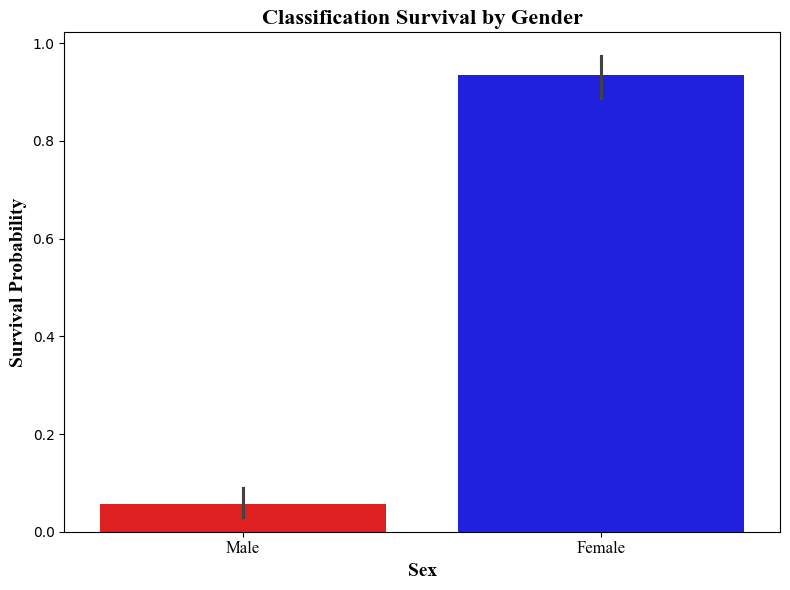

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=test_df, palette=['red', 'blue'])
ax.set_ylabel('Survival Probability', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
ax.set_xlabel('Sex', fontsize=14, color='black', fontweight='bold', fontname='Times New Roman')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontsize=12, fontname='Times New Roman')
ax.set_title('Classification Survival by Gender', fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.tight_layout()
plt.show()

### Save the DataFrame to a CSV file

In [ ]:
Titanic_submission.to_csv('Titanic_submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
